# Feature Transformation in ML Pipelines

Applying feature transformation to various datasets.  First try doing so manually, process involves:

Step 1

1. Create the covariance matrix of the dataset
2. Calculate the eigenvalues of the covariance matrix
3. Keep the top k eigenvalues (sorted by the descending eigenvalues)
4. Use the kept eigenvectors to transform new data-points

Step 2
 - Then lets try using our old friend scikit learn PCA in a pipeline

### PCA with infamous Iris dataset

To kick of experiments, lets try messing around with Iris dataset

In [142]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

np.random.seed(123)

In [143]:
iris = load_iris()

In [144]:
iris_X, iris_y = iris.data, iris.target

In [145]:
print("Features are of dimension {}".format(iris_X.shape))
print("Target is of dimension {}".format(iris_y.shape))

Features are of dimension (150, 4)
Target is of dimension (150,)


In [146]:
#get names of features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [147]:
#lets disply the data of the four features
#[(i,k) for i,k in enumerate(iris.feature_names)]

label_dict = {i:k for i,k in enumerate(iris.feature_names)}  
label_dict

{0: 'sepal length (cm)',
 1: 'sepal width (cm)',
 2: 'petal length (cm)',
 3: 'petal width (cm)'}

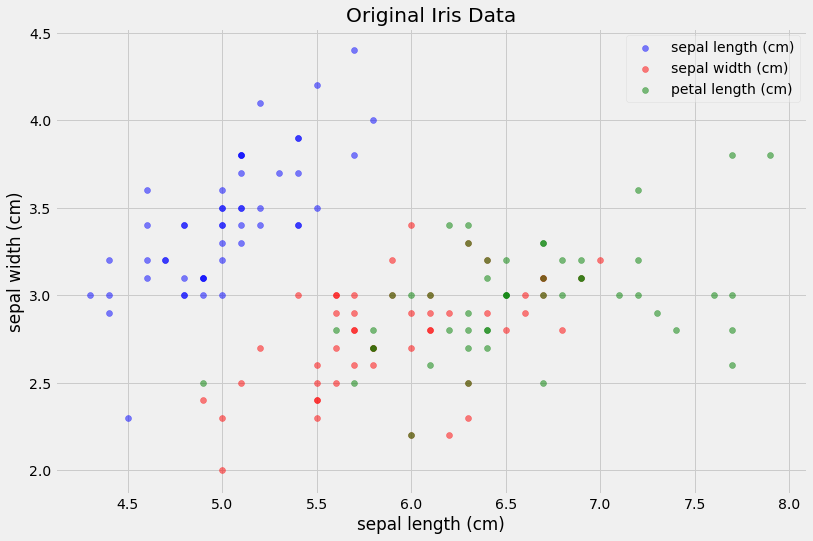

In [148]:
def plot(X,y,title,x_label,y_label):
    plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    for label,marker,color in zip(range(3),('^', 's', 'o'),('blue', 'red', 'green')):
        plt.scatter(x=X[:,0].real[y==label],y=X[:,1].real[y==label],color=color,alpha=0.5,label=label_dict[label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    
    plt.title(title)

plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)","sepal width (cm)")

        

### Creating the covariance matrix of the dataset

The covariance matrix is a d x d matrix (square matrix with the same number of features as
the number of rows and columns) that represents feature interactions between each feature

In [149]:
#get the mean
mean_vec = iris_X.mean(axis=0)
print("mean vector of features is {}".format(mean_vec))
print(" ")
#calc covarinace matrix
cov_mat = np.cov((iris_X - mean_vec).T)
print("4x4 covariance matrix is:")
print(cov_mat)

mean vector of features is [5.84333333 3.054      3.75866667 1.19866667]
 
4x4 covariance matrix is:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


### Calculating the eigenvalues of the covariance matrix


In [150]:
# calculate the eigenvectors and eigenvalues of the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [151]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print( 'Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1,eig_val_cov[i]))
    print( 30 * '-' )   

Eigenvector 1: 
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
Eigenvalue 1 from covariance matrix: 4.224840768320114
------------------------------
Eigenvector 2: 
[-0.65653988 -0.72971237  0.1757674   0.07470647]
Eigenvalue 2 from covariance matrix: 0.24224357162751575
------------------------------
Eigenvector 3: 
[-0.58099728  0.59641809  0.07252408  0.54906091]
Eigenvalue 3 from covariance matrix: 0.0785239080941545
------------------------------
Eigenvector 4: 
[ 0.31725455 -0.32409435 -0.47971899  0.75112056]
Eigenvalue 4 from covariance matrix: 0.02368302712600224
------------------------------


### Keeping the top k eigenvalues

need to decide how many of the eigenvalues to keep.  Lets try a  scree plot (percentage of total variance explained in
the data by each principal component). Sort the eigenvalues in
order of descending value and plot the cumulative variance explained by each component
and all components prior. In the case of iris, we will have four points on our scree plot,
one for each principal component.

In [152]:
# the percentages of the variance captured by each eigenvalue
# is equal to the eigenvalue of that components divided by
# the sum of all eigen values
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

Shows first principal component is responsible for 92% of our variance.  Lets cumsum the values and plot

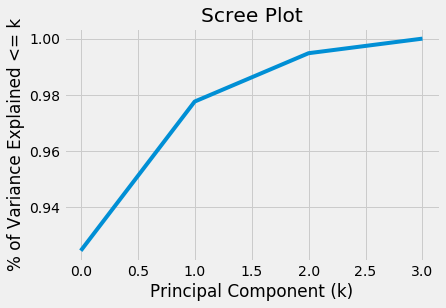

In [153]:
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot');
plt.xlabel('Principal Component (k)');
plt.ylabel('% of Variance Explained <= k');

First two components, by themselves, account for nearly 98% of the
total variance of the original dataset, meaning that if we only used the first two eigenvectors
and used them as our new principal components, then we would be in good shape

### Using the kept eigenvectors to transform new datapoints

Isolate the top two eigenvectors and store them in a new variable

In [154]:
# store the top two eigenvectors in a variable
top_2_eigenvectors = eig_vec_cov[:,:2].T
# show the transpose so that each row is a principal component, we have two
#rows == two components
top_2_eigenvectors

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

With these vectors in place, we can use them to project our data into the new and improved
superduper-dataset by multiplying the two matrices together: iris_X and
top_2_eigenvectors.  By multiplying the matrices together we could achieve a transfromed dataset of dimensions 150 x 2, **check table below** 

| Iris Data | top_2_eigenvectors.T | Transformed Iris Dataset
| --- | --- | --- | --- |
| 150 x 4 | 4 x 2 | 150 x 2


In [155]:
# to transform our data from having shape (150, 4) to (150, 2)
# we will multiply the matrices of our data and our eigen vectors together
np.dot(iris_X, top_2_eigenvectors.T)[:5,]

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829]])

So we have a new dataset with only 2 columns, could use in place of our original dataset in my machine learning pipeline - great!!.  
Repeat the above using scikit PCA

In [156]:
from sklearn.decomposition import PCA
# Like any other sklearn module, we first instantiate the class
pca = PCA(n_components=2)
# fit the PCA to our data
pca.fit(iris_X)
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

The two components match, almost exactly, our previous variable,
top_2_eigenvectors. the the second component is actually
the negative of the eigenvector we calculated. I think this is ok because,
mathematically, both eigenvectors are 100% valid and still achieve the primary
goal of creating uncorrelated columns

## Use PCA and LDA in machine learning pipeline

LDA is a extremely useful is that separating based on class
separability helps us avoid overfitting in our machine learning pipelines.
This is also known as preventing the curse of dimensionality. LDA also
reduces computational costs.


In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


In [158]:
# Create a PCA module to keep a single component
single_pca = PCA(n_components=1)
 # Create a LDA module to keep a single component
single_lda = LinearDiscriminantAnalysis(n_components=1)
 # Instantiate a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

In [159]:
#get baseline accuracy
# run a cross validation on the KNN without any featuretransformation
knn_average = cross_val_score(knn, iris_X, iris_y).mean()
knn_average

0.9803921568627452

In [160]:
#lets add lda
lda_pipeline = Pipeline([('lda',single_lda),('knn',knn)])
lda_average = cross_val_score(lda_pipeline,iris_X,iris_y).mean()
lda_average

0.9673202614379085

In [161]:
#lets try PCA
# create a pipeline that performs PCA
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])
pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()
pca_average

0.8941993464052288

In [162]:
# try LDA with 2 components
lda_pipeline = Pipeline([('lda',LinearDiscriminantAnalysis(n_components=2)),('knn', knn)])
lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()
#as good as original
lda_average

0.9803921568627452

In [163]:
#see if a feature selection can do any better
# compare our feature transformation tools to a feature selection tool
from sklearn.feature_selection import SelectKBest
# try all possible values for k, excluding keeping all columns
for k in [1, 2, 3]:
# make the pipeline
    select_pipeline = Pipeline([('select', SelectKBest(k=k)), ('knn', knn)])
     # cross validate the pipeline
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print(k, "best feature has accuracy:", select_average)

1 best feature has accuracy: 0.9538398692810457
2 best feature has accuracy: 0.9607843137254902
3 best feature has accuracy: 0.9738562091503268


Use GridSearch module to find the best combination across:
- Scaling data (with or without mean/std)
- PCA components
- LDA components
- KNN neighbors

In [164]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, # the model to grid search
                         params, # the parameter set to try
                         error_score=0.) # if a parameter set raises an error, continue and set the performance as 0
    grid.fit(X, y) # fit the model and parameters
    # our classical metric for performance
    print( "Best Accuracy: {}".format(grid.best_score_))
     # the best parameters that caused the best accuracy
    print( "Best Parameters: {}".format(grid.best_params_))
     # the average time it took a model to fit to the data (in seconds)
    avg_time_fit = round(grid.cv_results_['mean_fit_time'].mean(), 3)
    print("Average Time to Fit (s): {}".format(avg_time_fit))
    # the average time it took a model to predict out of sample data (in seconds)
    print( "Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

iris_params = {
 'preprocessing__scale__with_std': [True, False],
 'preprocessing__scale__with_mean': [True, False],
 'preprocessing__pca__n_components':[1, 2, 3, 4], #max allowed n_components for LDA is number of classes -1
 'preprocessing__lda__n_components':[1, 2],
 'clf__n_neighbors': range(1, 9)
}

# make a larger pipeline
preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()),('lda', LinearDiscriminantAnalysis())])

iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing),('clf',KNeighborsClassifier())])

get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

Best Accuracy: 0.9866666666666667
Best Parameters: {'clf__n_neighbors': 3, 'preprocessing__lda__n_components': 2, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.001
Average Time to Score (s):0.0


The best accuracy so far (near 99%) uses a combination of scaling, PCA, and LDA. 